In [2]:
import assets.helper as b3
import assets.functions as run


In [3]:
import pandas as pd
import numpy as np
import os

import assets.graphs as g
import random
import requests

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px


### QUOTES PRICES

In [ ]:
fund = run.sys_load_pkl(f'{b3.app_folder}/fund')
quotes = run.sys_load_pkl(f'{b3.app_folder}/quotes')


In [ ]:
fund.keys(), fund['BENS INDUSTRIAIS'].columns

In [ ]:
quotes.keys(), quotes['AERIS'].keys()

In [ ]:
df_preplot = {}
start_time = run.time.time()

for i, (setor, df_fund) in enumerate(fund.items()):
    df_fund = preprocess_data(df_fund)
    df_cd_conta = pivot_data(df_fund)

    df_unique = df_fund.drop_duplicates(subset=['DT_REFER', 'PREGAO']).drop(['CD_CONTA', 'DS_CONTA', 'VL_CONTA'], axis=1)
    df_premerged = pd.merge(df_unique, df_cd_conta, on=['DT_REFER', 'PREGAO'])
    df_resampled = resample_data(df_premerged)
    
    df_merged = merge_with_bigdata(df_resampled, bigdata)
    df_merged = df_merged.set_index('Date', drop=True)
    df_merged = df_merged.groupby('PREGAO', group_keys=False).apply(add_metrics)

    # Clean up the dataframe using the cleanup_dataframe function
    df_merged = cleanup_dataframe(df_merged)

    df_merged = add_metrics(df_merged)

    df_preplot[setor] = df_merged

    print(setor, run.sys_remaining_time(start_time, len(fund), i))


In [ ]:
# Define the path to the folder
company_folder = 'company'
folder_path = os.path.join(b3.app_folder, company_folder)

# Check if the folder does not exist
if not os.path.exists(folder_path):
    # Create the folder
    os.makedirs(folder_path)


In [ ]:
start_time = run.time.time()
for i, (setor, df) in enumerate(df_preplot.items()):
    companies = df['PREGAO'].unique()
    for i2, company in enumerate(companies):
        mask = df['PREGAO'] == company
        df_temp = df[mask]
        try:
            df_temp = run.sys_save_pkl(df_temp, f'{b3.app_folder}/{company_folder}/{company}')
        except Exception as e:
            pass
    print(setor, run.sys_remaining_time(start_time, len(df_preplot), i))


In [ ]:
mask = df_preplot['BENS INDUSTRIAIS']['TICKER'] == 'AERI3'
df_preplot['BENS INDUSTRIAIS'][mask]

### DASH

In [ ]:
company = 'AZEVEDO'
df = run.sys_load_pkl(f'{b3.app_folder}/{b3.company_folder}/{company}')
tickers = df['TICKER'].unique()
# df.columns.to_list()

In [ ]:
df['03.11 - Lucro Líquido']
df['14.04.01 - ROE (Resultado por Patrimônio)']
df['03.01 - Receita Bruta']
df['06.01 - Caixa das Operações']





In [ ]:
graphs = g.construct_graphs(df)
graphs.keys()

In [ ]:
import assets.lines
lines = assets.lines.report
groups = set(entry['title'][:2] for entry in lines)
groups

In [ ]:
for g, (group_key, group) in enumerate(graphs.items()):
    status = True if g == 0 else False
    plots = []
    for l, (line_key, line) in enumerate(group.items()):
        for p, (plot_key, plot_info) in enumerate(line.items()):
            for ticker in df['TICKER'].unique():
                df_ticker = df[df['TICKER'] == ticker]
                if not df.empty:
                    print(group[0][0]['info']['title'])
                    print(line[0]['info']['title'])
                    print(plot_info['info']['title'])
                    run.plot_tweak(plot_info, df_ticker).show();

In [ ]:
for ticker in tickers:
    df = df[df['TICKER'] == ticker]
    print(ticker, len(df))

    if not df.empty:
        for g, (group_key, group) in enumerate(merged_entries.items()):
            status = True if g == 0 else False
            plots = []
            for l, (line_key, line) in enumerate(group.items()):
                for p, (plot_key, plot_info) in enumerate(line.items()):
                    print(ticker)
                    run.plot_tweak(plot_info, df).show();

In [ ]:
fund = run.load_database()


In [ ]:
setores = []
for setor, df in fund.items():
    columns=['SETOR', 'SUBSETOR', 'SEGMENTO', 'PREGAO']
    setores.append(df[columns].drop_duplicates())
    print(setor)
sss = pd.concat(setores)
sss = sss.applymap(run.clean_text)

sss = run.sys_save_pkl(sss, f'{b3.app_folder}/sss')

In [ ]:
sss

In [ ]:
mask = sss['SUBSETOR'] == 'MATERIAL DE TRANSPORTE'
sss[mask]

#### Playground


In [ ]:
company_list = run.sys_load_pkl('company_list')
company_list

In [ ]:
listagem_siglas = ['NM', 'N1', 'N2', 'MA', 'M2', 'MB', 'DR1', 'DR2', 'DR3', 'DRE', 'DRN']
listagem_extenso = ['Novo Mercado', 'Nível 1 de Governança Corporativa', 'Nível 2 de Governança Corporativa', 'Bovespa Mais', 'Bovespa Mais Nível 2', 'Organização Tradicional OTC', 'BDR Nível 1', 'BDR Nível 2', 'BDR Nível 3', 'BDR ETF', 'BDR Não Patrocinado']
list_dict = dict(zip(listagem_siglas, listagem_extenso))
list_dict

#### Merge and update


In [ ]:
driver, wait = run.sys_load_browser()
url = 'https://sistemaswebb3-listados.b3.com.br/listedCompaniesPage/search?language=pt-br' 



In [ ]:
b3_cols = b3.cols_b3_companies + b3.col_b3_companies_extra_columns
companies__local = run.sys_read_or_create_dataframe('company', b3_cols).fillna('')
b3_companies_tickers = run.sys_load_pkl('b3_companies_tickers')

b3_companies_tickers = run.get_b3_tickers(driver, wait, url)
for col in b3_cols:
    if col not in b3_companies_tickers.columns:
        b3_companies_tickers[col] = ''
b3_companies_tickers = b3_companies_tickers[b3_cols]
# b3_companies_tickers = sys_save_pkl(b3_companies_tickers, 'b3_companies_tickers')

key_columns = ['ticker', 'company_name']
len(b3_companies_tickers), len(companies__local)

In [ ]:
merged = pd.merge(companies__local, b3_companies_tickers[:], how='outer', on=key_columns, indicator=True)

update_strict = merged[merged['_merge'] == 'right_only'][key_columns] # only companies new in web
update_broad = merged[merged['_merge'] != 'left_only'][key_columns] # all companies from web
updated = update_strict

len(update_broad), len(update_strict)

In [ ]:
key_columns = ['company_name', 'ticker']
b3_cols = b3.cols_b3_companies + b3.col_b3_companies_extra_columns
b3_cols_float = ['Capital Social']
b3_str_cols = [col for col in b3_cols if col not in  b3_cols_float]
col_types = {col: 'float' if col in b3_cols_float else 'str' for col in b3_cols}


In [ ]:
driver.get(b3.url)
# time.sleep(1)

size = len(updated)
# Iterate through the new companies to extract detailed information
new_companies = []
start_time = run.time.time()
for i, (index, row) in enumerate(updated.iterrows()):
    driver.get(b3.url)
    new_company = run.b3_get_company_info(row, driver, wait)
    new_company = pd.DataFrame([new_company], columns=b3_cols).astype(col_types)
    new_company['Capital Social'] = new_company['Capital Social'].replace(np.nan, 0.0)
    new_company = new_company.replace('nan', '')
    new_company['Capital Social'] = pd.to_numeric(new_company['Capital Social'], errors='coerce').astype('float')

    try:
        if not new_company.empty:
            cnpj = new_company['cnpj'][0]
            url = f'https://cnpj.biz/{cnpj}'
            response = requests.get(url, headers={"User-Agent": random.choice(b3.USER_AGENTS)})
            extra = run.b3_get_company_extra_cnpj_info(response)
            extra = pd.DataFrame([extra], columns=b3_cols).fillna('')
            extra = extra.astype(col_types)
        else:
            extra = pd.DataFrame([], columns=b3_cols)

    except Exception as e:
        pass
    extra = extra.reset_index(drop=True)
    new_company = pd.merge(new_company[b3.cols_b3_companies], extra[b3.col_b3_companies_extra_columns], left_on='cnpj', right_on='CNPJ', how='outer').fillna('').reset_index(drop=True)
    new_companies.append(new_company)
    
    print(run.sys_remaining_time(start_time, size, i), row['ticker'], row['company_name'])

    if (size-i-1) % (b3.bin_size/10) == 0:
        temp = pd.concat(new_companies).reset_index(drop=True)
        temp['Capital Social'] = pd.to_numeric(temp['Capital Social'], errors='coerce').astype('float')
        temp['Capital Social'] = temp['Capital Social'].replace(np.nan, 0.0)
        temp = pd.merge(companies__local, temp, on=b3_cols, how='outer', indicator=False).fillna('').drop_duplicates(subset=key_columns, keep='last').reset_index(drop=True)
        temp = sys_save_and_pickle(temp, 'company')


In [ ]:
temp

In [ ]:
for col in b3_cols:
    d1 = new_company[col].dtype
    d2 = extra[col].dtype
    print(col, d1, d2)
    if d1 != d2:
        print(col, d1, d2)
    

In [ ]:
b3_cols

##### CVM GET CODE

In [ ]:
for i in range(0,1000+1):
    url = f'https://sistemaswebb3-listados.b3.com.br/listedCompaniesPage/main/{i}/ABCD/overview?language=pt-br'
    print(url)

##### Final Company Get

In [ ]:
companies__local = run.sys_read_or_create_dataframe('company', b3_cols)


In [ ]:
companies__local.columns

In [ ]:
mask = companies__local['Estado'] == ''
# mask &= companies__local['cnpj'] != ''
companies__local = companies__local[~mask]

In [ ]:
companies__local = run.sys_save_and_pickle(companies__local, 'companies__local')

### Playground

In [219]:
year = 2019
df = run.sys_load_pkl(f'{b3.app_folder}/temp_' + f'cvm_web_clean_{year}')
b3.unique_sheet_cols


['CNPJ_CIA', 'AGRUPAMENTO', 'CD_CONTA', 'DS_CONTA', 'COLUNA_DF']

In [218]:
df = df.drop_duplicates(subset=['CNPJ_CIA', 'AGRUPAMENTO', 'CD_CONTA', 'DT_REFER', 'COLUNA_DF'], keep='first')


In [14]:
df.to_csv('temp_cvm_web_clean_2019.csv', index=False)

In [220]:
datetime_columns = ['DT_REFER', 'DT_FIM_EXERC', 'DT_INI_EXERC', ]
for col in datetime_columns:
    try:
        df[col] = pd.to_datetime(df[col])
    except Exception as e:
        pass


In [223]:
# mask = df['DT_REFER'].dt.quarter.isin([2, 3])
mask = df['CNPJ_CIA'] == '00.001.180/0001-26'
mask &= df['AGRUPAMENTO'] == 'con'
mask &= df['CD_CONTA'] == '3.01'
# mask &= df['CD_CONTA'] == '5.01'
# mask &= df['DT_REFER'].dt.quarter == 3
mask &= df['COLUNA_DF'].isna()
# mask &= df['COLUNA_DF'] == 'Capital Social Integralizado'
# mask &= df['DT_INI_EXERC'] != '2019-01-01'
# mask &= df['DT_INI_EXERC'] != '2019-04-01'
# mask &= df['DT_INI_EXERC'] != '2019-07-01'

In [224]:
df[mask]

,FILENAME,DEMONSTRATIVO,BALANCE_SHEET,ANO,AGRUPAMENTO,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,DT_INI_EXERC,COLUNA_DF
2288647,itr_cia_aberta_DRE_con_2019.csv,itr,DRE,2019,con,00.001.180/0001-26,2019-03-31,1,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,UNIDADE,2019-03-31,3.01,Receita de Venda de Bens e/ou Serviços,6.451762e+09,S,2019-01-01,NaN
2288742,itr_cia_aberta_DRE_con_2019.csv,itr,DRE,2019,con,00.001.180/0001-26,2019-06-30,1,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,UNIDADE,2019-06-30,3.01,Receita de Venda de Bens e/ou Serviços,1.309517e+10,S,2019-01-01,NaN
2288946,itr_cia_aberta_DRE_con_2019.csv,itr,DRE,2019,con,00.001.180/0001-26,2019-09-30,2,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,UNIDADE,2019-09-30,3.01,Receita de Venda de Bens e/ou Serviços,2.038650e+10,S,2019-01-01,NaN
3712609,dfp_cia_aberta_DRE_con_2019.csv,dfp,DRE,2019,con,00.001.180/0001-26,2019-12-31,1,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,UNIDADE,2019-12-31,3.01,Receita de Venda de Bens e/ou Serviços,2.772553e+10,S,2019-01-01,NaN


In [156]:
mask = df['CD_CONTA'].str[0].isin(b3.last_quarters)
mask &= (df['DT_REFER'].dt.quarter == 2) | (df['DT_REFER'].dt.quarter == 3)


In [205]:
df2 = df.drop_duplicates(subset=['CNPJ_CIA', 'AGRUPAMENTO', 'CD_CONTA', 'DT_REFER', 'COLUNA_DF'], keep='first')


In [213]:
mask = df2['CNPJ_CIA'] == '00.001.180/0001-26'
mask &= df2['AGRUPAMENTO'] == 'con'
mask &= df2['CD_CONTA'] == '6.01'
# mask &= df2['CD_CONTA'] == '5.01'
# mask &= df2['DT_REFER'].dt.quarter == 3
mask &= df2['COLUNA_DF'].isna()
# mask &= df2['COLUNA_DF'] == 'Reservas de Lucro'


In [214]:
df2[mask]

,FILENAME,DEMONSTRATIVO,BALANCE_SHEET,ANO,AGRUPAMENTO,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,DT_INI_EXERC,COLUNA_DF
968182,itr_cia_aberta_DFC_MI_con_2019.csv,itr,DFC_MI,2019,con,00.001.180/0001-26,2019-03-31,1,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Demonstração do Fluxo de Caix...,REAL,UNIDADE,2019-03-31,6.01,Caixa Líquido Atividades Operacionais,-3.619800e+08,S,2019-01-01,NaN
968332,itr_cia_aberta_DFC_MI_con_2019.csv,itr,DFC_MI,2019,con,00.001.180/0001-26,2019-06-30,1,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Demonstração do Fluxo de Caix...,REAL,UNIDADE,2019-06-30,6.01,Caixa Líquido Atividades Operacionais,-1.176219e+09,S,2019-01-01,NaN
968474,itr_cia_aberta_DFC_MI_con_2019.csv,itr,DFC_MI,2019,con,00.001.180/0001-26,2019-09-30,2,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Demonstração do Fluxo de Caix...,REAL,UNIDADE,2019-09-30,6.01,Caixa Líquido Atividades Operacionais,2.376147e+09,S,2019-01-01,NaN
3195200,dfp_cia_aberta_DFC_MI_con_2019.csv,dfp,DFC_MI,2019,con,00.001.180/0001-26,2019-12-31,1,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Demonstração do Fluxo de Caix...,REAL,UNIDADE,2019-12-31,6.01,Caixa Líquido Atividades Operacionais,-8.632900e+07,S,2019-01-01,NaN


In [ ]:
filename = 'temp_cvm_updated'
# filename = 'temp_cvm_web_clean'
df_load = run.sys_load_pkl(f'{b3.app_folder}/{filename}')
df = df_load
# df = df.set_index('DT_REFER', drop=True)

In [10]:
year = 2015
df = df_load[year]
df = df.set_index('DT_REFER', drop=True)

In [12]:
mask = df['CNPJ_CIA'] == '00.001.180/0001-26'
mask &= df['AGRUPAMENTO'] == 'con'
mask &= df['CD_CONTA'] == '3.01'
# mask &= df['COLUNA_DF'] == 'Reservas de Lucro'
# mask &= df['COLUNA_DF'].isna()

df[mask]

,FILENAME,DEMONSTRATIVO,BALANCE_SHEET,ANO,AGRUPAMENTO,CNPJ_CIA,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,DT_INI_EXERC,COLUNA_DF
DT_REFER,,,,,,,,,,,,,,,,,,,
2015-03-31,itr_cia_aberta_DRE_con_2015.csv,itr,DRE,2015,con,00.001.180/0001-26,1,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,UNIDADE,2015-03-31,3.01,Receita de Venda de Bens e/ou Serviços,8598882000.0,S,2015-01-01,NaN
2015-06-30,itr_cia_aberta_DRE_con_2015.csv,itr,DRE,2015,con,00.001.180/0001-26,1,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,UNIDADE,2015-06-30,3.01,Receita de Venda de Bens e/ou Serviços,16825743000.0,S,2015-01-01,NaN
2015-09-30,itr_cia_aberta_DRE_con_2015.csv,itr,DRE,2015,con,00.001.180/0001-26,1,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,UNIDADE,2015-09-30,3.01,Receita de Venda de Bens e/ou Serviços,24728132000.0,S,2015-01-01,NaN
2015-12-31,dfp_cia_aberta_DRE_con_2015.csv,dfp,DRE,2015,con,00.001.180/0001-26,2,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,UNIDADE,2015-12-31,3.01,Receita de Venda de Bens e/ou Serviços,32588838000.0,S,2015-01-01,NaN


In [38]:
import pandas as pd
import plotly.express as px


In [96]:
b3.unique_sheet_cols

['CNPJ_CIA', 'AGRUPAMENTO', 'CD_CONTA', 'DS_CONTA', 'COLUNA_DF']

In [4]:
df = run.sys_load_pkl(f'{b3.app_folder}/temp_math_web_2011')
# datetime_columns = ['DT_REFER', 'DT_FIM_EXERC', 'DT_INI_EXERC', ]
# for col in datetime_columns:
#     try:
#         df[col] = pd.to_datetime(df[col])
#     except Exception as e:
#         pass
df = df.set_index('DT_REFER', drop=True)
# grouped = df_merged.groupby(['CNPJ_CIA', 'AGRUPAMENTO', 'CD_CONTA', 'DS_CONTA'], group_keys=False)
# # calculated_df = grouped.apply(run.cvm_math_calculations_adjustments).reset_index(drop=True)


In [9]:
mask = df['CNPJ_CIA'] == '00.001.180/0001-26'
mask &= df['AGRUPAMENTO'] == 'con'
mask &= df['CD_CONTA'] == '2.03'
mask &= df['COLUNA_DF'].isna()
# mask &= df['CD_CONTA'] == '5.01'
# mask &= df['COLUNA_DF'] == 'Patrimônio Líquido'

df[mask]

,FILENAME,DEMONSTRATIVO,BALANCE_SHEET,ANO,AGRUPAMENTO,CNPJ_CIA,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,DT_INI_EXERC,COLUNA_DF
DT_REFER,,,,,,,,,,,,,,,,,,,
2011-03-31,itr_cia_aberta_BPP_con_2011.csv,itr,BPP,2011,con,00.001.180/0001-26,1,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Balanço Patrimonial Passivo,REAL,UNIDADE,2011-03-31,2.03,Patrimônio Líquido Consolidado,7.699941e+10,S,NaT,NaN
2011-06-30,itr_cia_aberta_BPP_con_2011.csv,itr,BPP,2011,con,00.001.180/0001-26,3,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Balanço Patrimonial Passivo,REAL,UNIDADE,2011-06-30,2.03,Patrimônio Líquido Consolidado,7.627831e+10,S,NaT,NaN
2011-09-30,itr_cia_aberta_BPP_con_2011.csv,itr,BPP,2011,con,00.001.180/0001-26,2,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Balanço Patrimonial Passivo,REAL,UNIDADE,2011-09-30,2.03,Patrimônio Líquido Consolidado,7.773819e+10,S,NaT,NaN
2011-12-31,dfp_cia_aberta_BPP_con_2011.csv,dfp,BPP,2011,con,00.001.180/0001-26,1,CENTRAIS ELET BRAS SA ELETROBRAS,2437,DF Consolidado - Balanço Patrimonial Passivo,REAL,UNIDADE,2011-12-31,2.03,Patrimônio Líquido Consolidado,7.720232e+10,S,NaT,NaN


<Axes: xlabel='DT_REFER'>

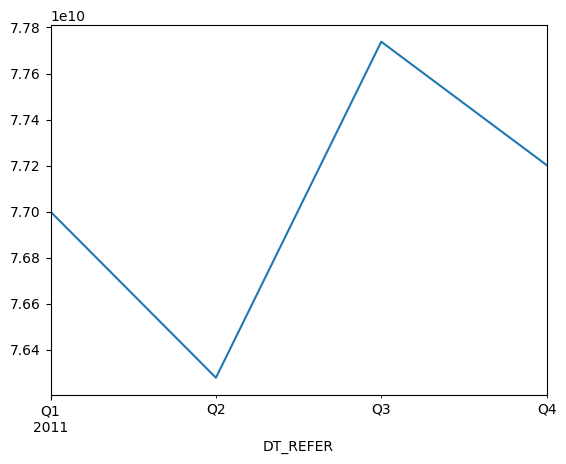

In [10]:
df[mask]['VL_CONTA'].plot()